In [27]:
import torch
import sys
sys.path.append('../../modules')
from notable_functions import runge_function as fn
from nn_poly import PolynomialInterpolant
import matplotlib.pyplot as plt

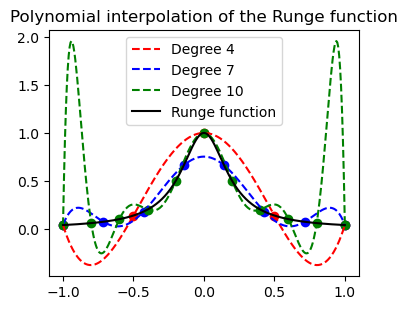

In [30]:
colors = ['red', 'blue', 'green']
x_ver = torch.linspace(-1, 1, 300).reshape((-1, 1))
y_ver = fn(x_ver)

fig = plt.figure(figsize=(4, 3.2))
i = 0
for n in [5, 8, 11]:
    x = torch.linspace(-1, 1, n).reshape((-1, 1))
    y = fn(x)

    poly = PolynomialInterpolant(degree=n-1)
    opt_coefs = torch.linalg.solve(poly.get_interpolation_matrix(x), y)
    poly.set_coefs(opt_coefs.T)
    
    with torch.no_grad():
        plt.plot(x_ver, poly(x_ver), color=colors[i], label=f'Degree {n - 1}', linestyle='--')
        plt.scatter(x, y, color=colors[i])
    i += 1
    
plt.plot(x_ver, y_ver, color='black', label='Runge function')
plt.legend()
plt.title('Polynomial interpolation of the Runge function')
plt.show()